# 情報計算科学の基礎レポート5(差分解析)



## 解析結果の可視化

以下のセルを実行すると各時刻での各点における$u$の値を$[\mathrm{umin}, \mathrm{umax}]$の範囲に制限し、三次元のアニメーションとして描写します。

※ セルの実行に1分ほどかかります。

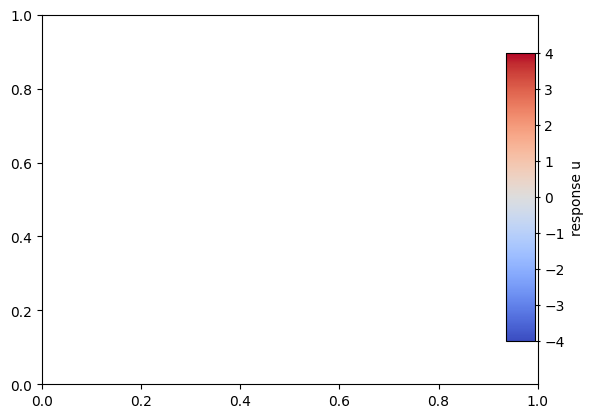

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

fig = plt.figure()
fig.set_dpi(100)
ax = Axes3D(fig)
surf=ax.plot_surface(X, Y, u[0], rstride=1, cstride=1, cmap=plt.cm.coolwarm,vmax=umax,vmin=umin)
fig.colorbar(surf, shrink=0.6, aspect=10, label='response u')

def animate(i):
    ax.clear()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlim(umin, umax)
    ax.plot_surface(X, Y, u[i], rstride=1, cstride=1, cmap=plt.cm.coolwarm,vmax=umax,vmin=umin)

anim=animation.FuncAnimation(fig,animate,frames=nt-1,interval=100,repeat=True)

rc('animation', html='jshtml')
anim

以下の関数群を解析結果の可視化に使用しても構いません

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_graph(Z, umin, umax):
    fig = plt.figure()
    fig.set_dpi(100)

    ax = Axes3D(fig)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlim(umin, umax)
    surf=ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,vmax=umax,vmin=umin)
    fig.colorbar(surf, shrink=0.6, aspect=10, label='response u')

    fig.show()


def visualize_2d_graph(Y, dt):
    plt.grid()
    plt.xlabel('time t')
    plt.ylabel('response u')
    X = [dt*t for t in range(len(Y))]
    plt.plot(X, Y)

    plt.show()

関数visualize_3d_graphは、時刻$　t　$での各点における$u$の値を$[\mathrm{umin}, \mathrm{umax}]$の範囲に制限して三次元グラフとして描写します。

グラフは右クリックで保存することができます。

![](https://drive.google.com/uc?export=view&id=1WLWQfUgtJdoJdvr_vckvmfT-eM8KnJW2)

In [4]:
visualize_3d_graph(u[40], umin, umax)
print(umax,umin)
# print(100 * u[40])

NameError: name 'u' is not defined

関数visualize_2d_graphは、点$(x, y)$における$u$の$dt$刻みの時刻歴データを二次元グラフとして描写します。

こちらも右クリックでグラフを保存することができます。

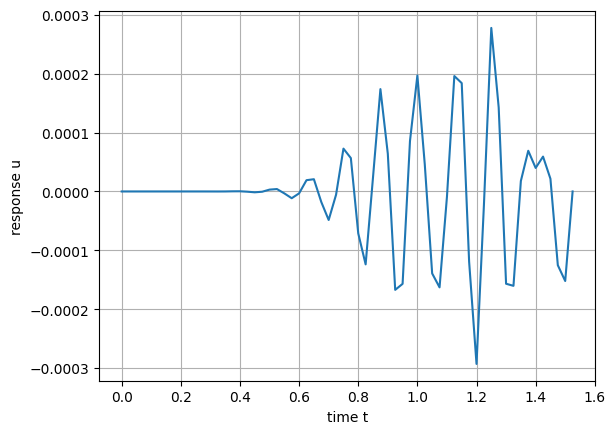

In [ ]:
visualize_2d_graph(u[:, 10, 10], dt)

# レポート第5回

 $ \frac{1}{c^2} \frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} $ 

 但し、 $ x,y \in [0,1]  $,
 $ t \in [0,1.5] $, 
 $ c=1 $

また、$ B.C $として

$ u(x,y,t) = (1-2\alpha^2\pi^2(t-t_0)^2)  exp(-\alpha^2\pi^2(t-t_0)^2) ,  $

$ \alpha = 1[Hz]$

$ I.T $ として、

$ u(x,y,0) = 0, $

$ \frac{\partial u}{\partial t}(x,y,0) = 0 $ 

## (1) 
$ ds = 0.05, dt = 0.025 $ として、uの分布(時系列のコンターおよび、 $ (x,y)=(0.6,0.6) $ での時刻歴波形)

In [6]:
def check_is_boundary(u_in,i_in:int,j_in:int,k_in:int, dt_in = dt, ds_in = dx,c_in = 1,nx_in = nx, ny_in = ny,nt_in = nt) -> bool:
    '''if boundary , return True'''
    if (i_in*ds_in >= xmax or i_in <= 0):
        return True
    elif(j_in*ds_in >= ymax or j_in <= 0):
        return True
    else:
        return False

def RICKER(k_in:int,dt_in=dt,alpha_in = 1,t_0_in = 1):
    sq_alpha_pi_t = (alpha_in * math.pi * (k_in*dt_in - t_0_in) )**2

    return (1 - 2 * sq_alpha_pi_t) * math.exp(- sq_alpha_pi_t)


def calc_element_next_time(u_in,i_in:int,j_in:int,k_in:int, dt_in = dt, ds_in = dx,c_in = 1,nx_in = nx, ny_in = ny,nt_in = nt)-> float :
    '''return u_in[i][j][k+1]'''
    
    # print(f'i_in\t:{i_in},\tj_in\t:{j_in},\tk_in\t:{k_in}')

    if check_is_boundary(u_in,i_in,j_in,k_in):
        return RICKER(k_in)

    coefficient = ((c_in**2) * (dt_in**2))/( ds_in**2 )
    
    term1 =  u_in[k_in][i_in+1][j_in] - 2*u_in[k_in][i_in][j_in] + u_in[k_in][i_in-1][j_in]
    term1 += u_in[k_in][i_in][j_in+1] - 2*u_in[k_in][i_in][j_in] + u_in[k_in][i_in][j_in-1]

    term2 =  u_in[k_in][i_in][j_in]   - u_in[k_in - 1][i_in][j_in]

    return coefficient * term1 + term2
    

## 解析コードの骨格
このコードを書き替えて差分法解析としてください

In [5]:
import numpy as np
import math

dx = 0.05
dy = dx
dt = 0.025
tmin = 0.0 
tmax = 1.5 #simulate time

#rectangle domain
xmin = 0.0
xmax = 1.0
ymin = 0.0
ymax = 1.0

nx = int((xmax-xmin)/dx) + 1
ny = int((ymax-ymin)/dy) + 1
nt = int((tmax-tmin)/dt) + 2

#mesh
X = np.linspace(xmin, xmax, nx)
Y = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(Y, X)

#solution
u = np.zeros((nt,nx,ny))

print("nx=",nx,"ny=",ny,"nt=",nt)

umax = 4
umin = -4

#simulation
for t in range(1,nt-1):
    # t = 0 : k = 1
    for x in range(0,nx):
        for y in range(0,ny):
            # u[t][x][y] = umax*math.sin(0.1*(x+y+t))
            # print(f'\nx\t\t:{x},\ty\t\t:{y},\tt\t\t:{t}')
            u[t][x][y] = calc_element_next_time(u,x,y,t-1)

print("simulation: Done")

nx= 21 ny= 21 nt= 62


NameError: name 'calc_element_next_time' is not defined